In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

%matplotlib inline

# Support Vector Machine

## Split train and test data

In [2]:
from sklearn.datasets import make_classification
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

## Build a model and fit the data

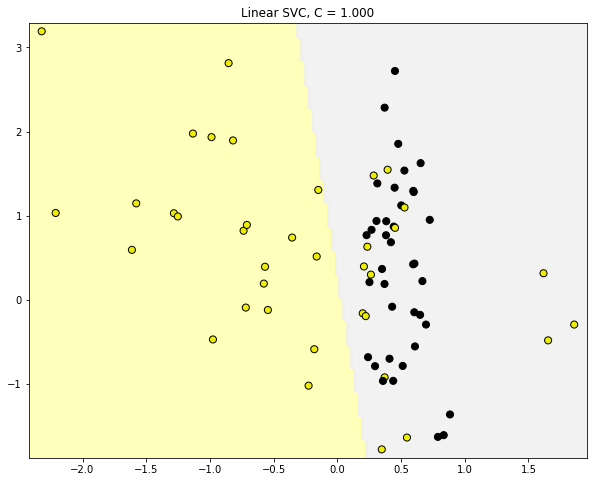

In [7]:
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC

fig, subaxes = plt.subplots(1, 1, figsize = (10,8))
this_c = 1.0

clf = SVC(kernel = 'linear', C = this_c).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_c)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)


## Various C values

C => 1e-05
Accuracy on Train data : 0.5066666666666667
Accuracy on Test data : 0.4


C => 0.1
Accuracy on Train data : 0.7733333333333333
Accuracy on Test data : 0.72


C => 1
Accuracy on Train data : 0.8
Accuracy on Test data : 0.76


C => 10
Accuracy on Train data : 0.8
Accuracy on Test data : 0.76




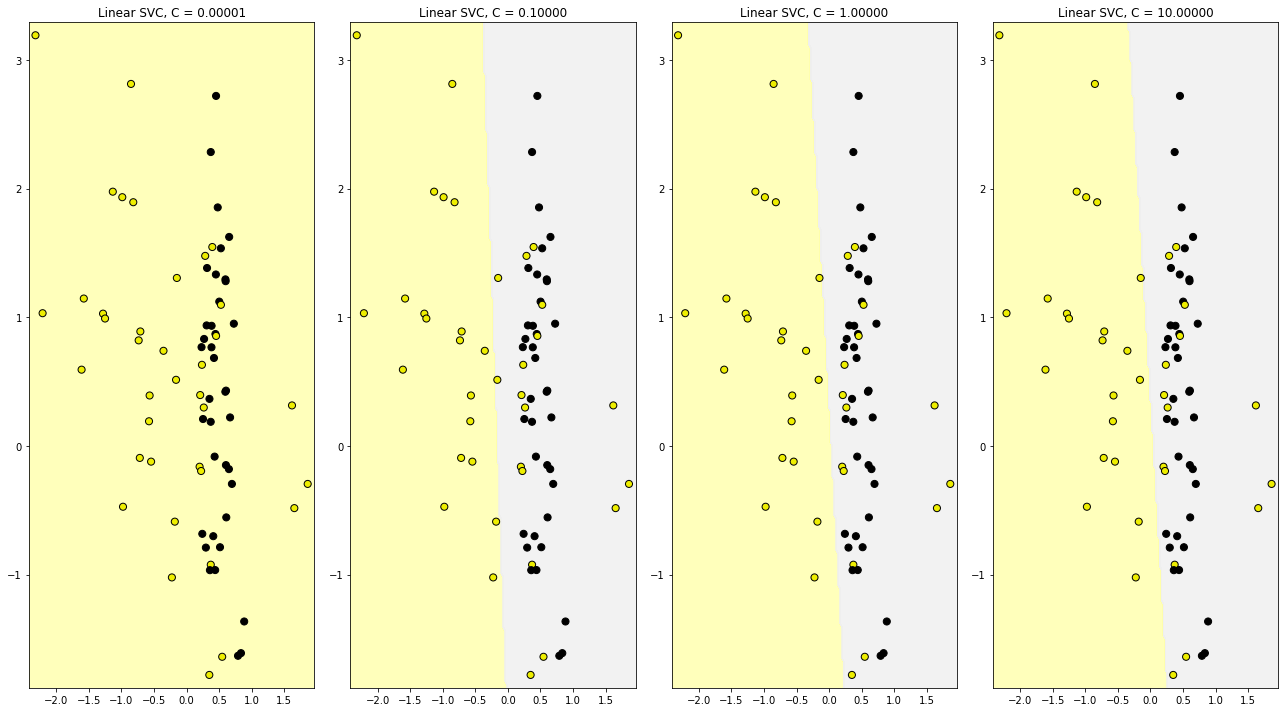

In [12]:
fig, subaxes = plt.subplots(1, 4, figsize = (18, 10))
for c, subplot in zip([0.00001, 0.1, 1, 10], subaxes):
    clf = SVC(kernel = 'linear', C = c).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(c)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)  
    print('C => '+str(c))
    print('Accuracy on Train data : '+str(clf.score(X_train, y_train)))
    print('Accuracy on Test data : '+str(clf.score(X_test, y_test)))
    print('\n')
plt.tight_layout()

# Multi-class classification with linear models (similar to SVM)

In [14]:
from sklearn.svm import LinearSVC

fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

In [20]:
clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

Coefficients:
 [[-0.27633005  0.69057845]
 [-1.63317515  1.15445369]
 [-0.01043478  0.39651477]
 [ 1.25601979 -1.6581305 ]]
Intercepts:
 [-3.31565824  1.19926388 -2.67374314  1.159871  ]


We got 4 coefficients and 4 intercepts for each class. There are 4 types of fruits we want our classifier to distinguish.

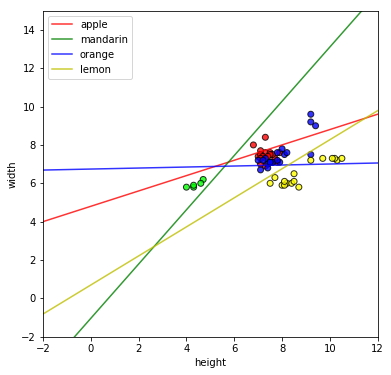

In [30]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits_2d['height'], X_fruits_2d['width'], c = y_fruits_2d, cmap = cmap_fruits, edgecolor = 'black', 
           alpha = 0.8)

x_0_range = np.linspace(-10, 15)
for w, b, color in zip(clf.coef_, clf.intercept_, colors):
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()    

# Kernel SVM

## RBF

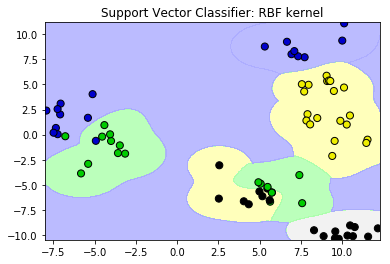

In [31]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from adspy_shared_utilities import plot_class_regions_for_classifier

X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

## Polynomial Kernel

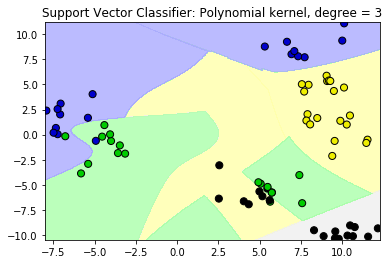

In [34]:
# Compare decision boundries with polynomial kernel, degree = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

## Gamma value

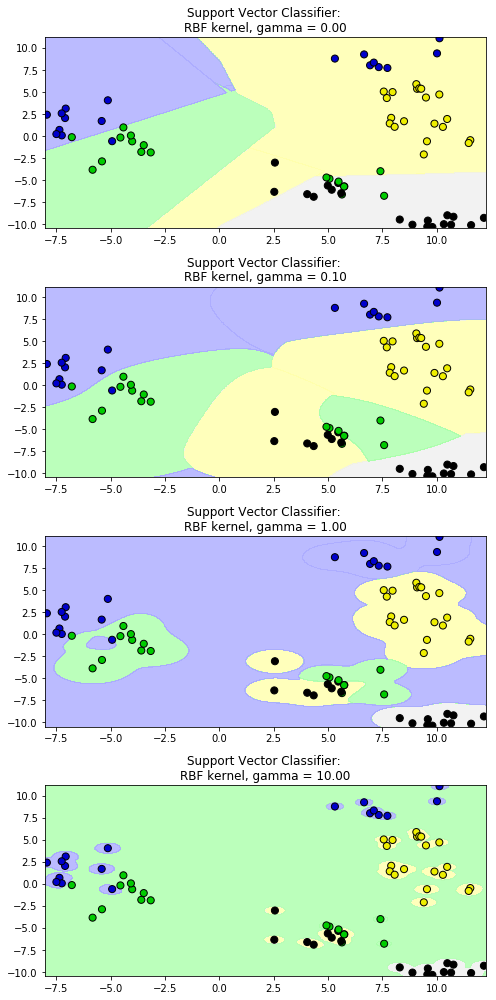

In [35]:
fig, subaxes = plt.subplots(4, 1, figsize=(7, 14))

for gamma, subplot in zip([0.001, 0.1, 1.0, 10.0], subaxes):
    clf = SVC(gamma = gamma).fit(X_train, y_train)
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    plt.tight_layout()    

# Apply to real-life data

## without normalization

In [36]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

In [37]:
clf = SVC(C = 10).fit(X_train, y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 1.00
Accuracy of RBF-kernel SVC on test set: 0.63


This is obviously an indicator of overfitting since it is perfect on train set whereas the performance of the model is really bad on test set.

## With normalization

In [39]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [40]:
clf = SVC(C = 10).fit(X_train_scaled, y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 0.98
Accuracy of RBF-kernel SVC on test set: 0.96
